In [33]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [34]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis = 0)
y = np.sin(X).ravel()
# add noise to targets
y[::5] += 3 * np.random.rand(8)

In [35]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [36]:
# look at the results
lw = 2
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

In [56]:
# svr_rbf.fit(X, y)
# svr.support_
# X[svr.support_]

array([[0.09258381],
       [0.46420618],
       [0.88472205],
       [0.94341251],
       [0.98226187],
       [1.13267051],
       [1.1486249 ],
       [1.60348103],
       [1.72439641],
       [2.66076366],
       [3.41248798],
       [3.92422454],
       [4.10362214],
       [4.18901885],
       [4.24420029],
       [4.43573124],
       [4.56025623],
       [4.78332408],
       [4.92836307]])

In [53]:
# [*enumerate(svrs)]
# [*zip((0,1,2), svrs)]

[(1, SVR(C=100, gamma=0.1)),
 (2, SVR(C=100, gamma='auto', kernel='linear')),
 (3, SVR(C=100, coef0=1, gamma='auto', kernel='poly'))]

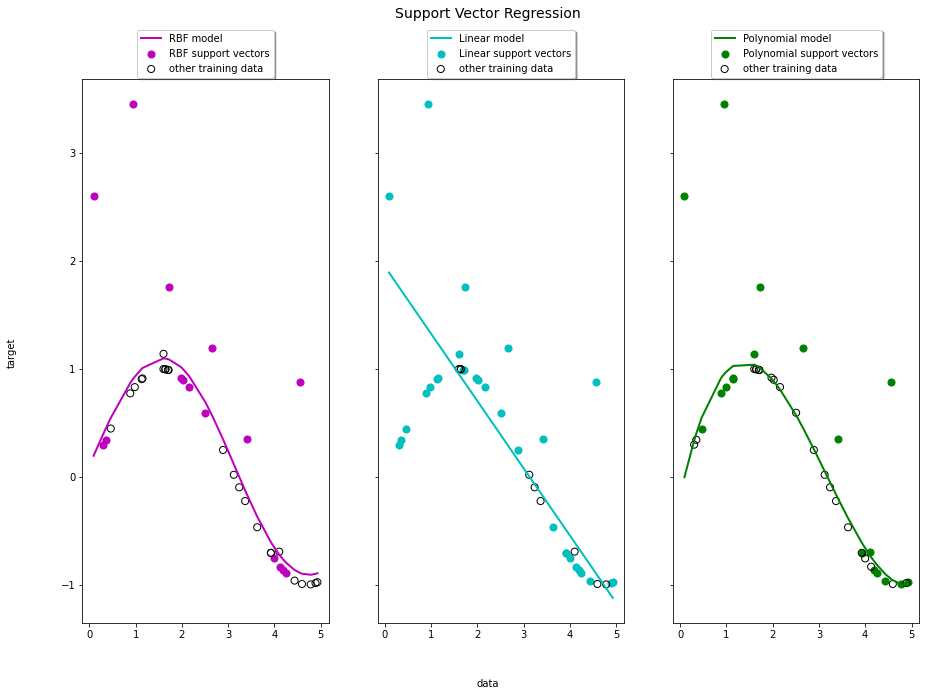

In [59]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor=model_color[ix],
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )
    
fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()